In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [2]:
loc = "../local_data/log14"
types = 'crx'

In [3]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [4]:
mean_loss_ng = np.mean(energies_ng, axis=1)

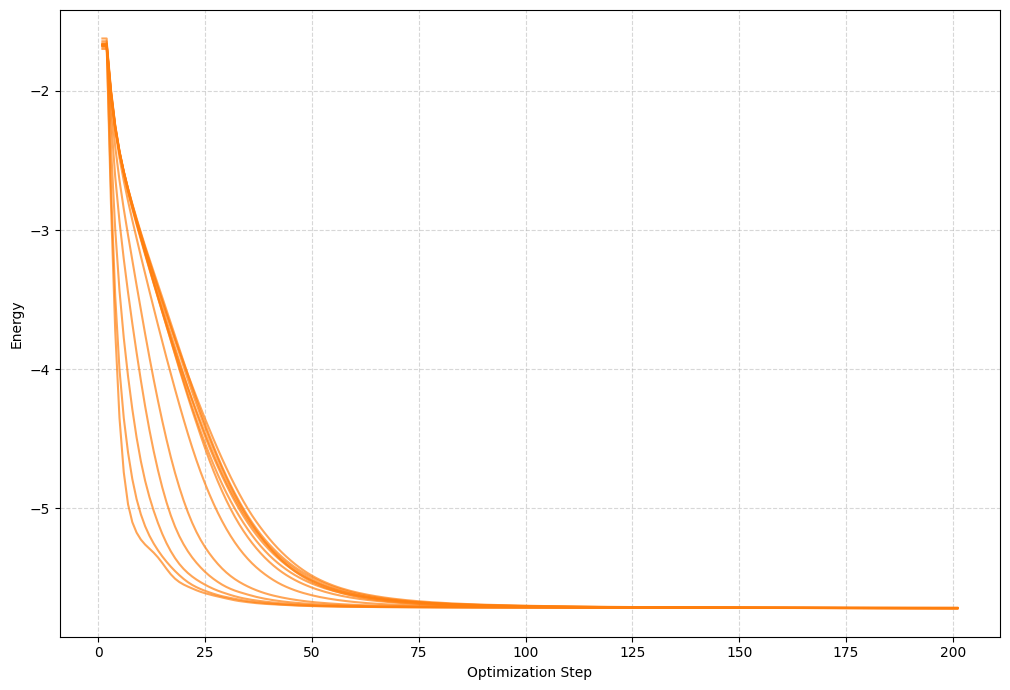

In [5]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_ng.shape[1] + 1)

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [14]:
exact_energy = -5.74032428
thetas = np.arange(0, 40, np.pi)

In [15]:
min_ng = np.min(energies_ng, axis=1)[:,-1]

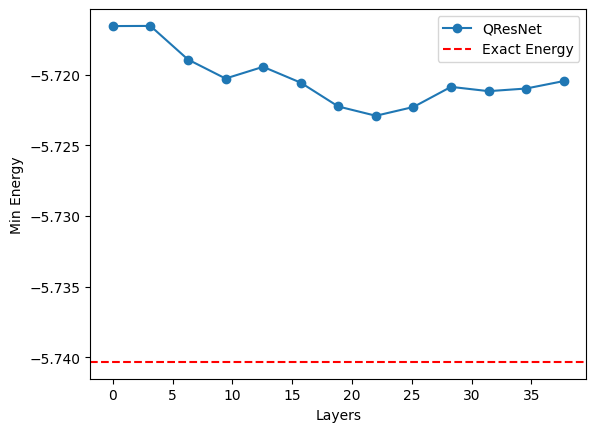

In [16]:
plt.plot(thetas, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [17]:
median_ng = np.median(energies_ng, axis=1)[:,-1]

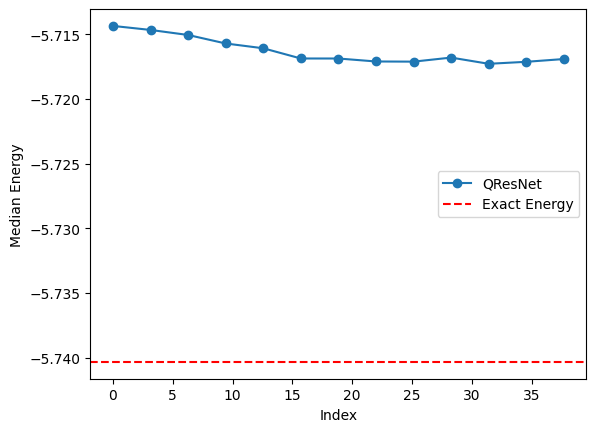

In [19]:
plt.plot(thetas, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()